# Technical Analysis for Project 1

In [102]:
import warnings
#warnings.filterwarnings('ignore')

In [103]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sqlite3
import datetime

In [104]:
import yfinance as yf
import option
import utils

In [105]:
# import library
from stock import Stock

from TA import SimpleMovingAverages, RSI, ExponentialMovingAverages

In [106]:
opt = option.Option()
# set default settings

# we use relative path here, you can set it with a full path
opt.data_dir = "./data"
opt.output_dir = os.path.join(opt.data_dir, "daily")
opt.sqlite_db = os.path.join(opt.data_dir, "sqlitedb/Equity.db")

# override default option if needed, otherwise use the default settings

In [107]:
# Set the current working directory to the desired path
new_working_directory = r'C:\Program Files\SQLiteStudio\LABS'
os.chdir(new_working_directory)

In [108]:
print(os.getcwd())

C:\Program Files\SQLiteStudio\LABS


In [109]:
# check if all the attributes of the option object
print(vars(opt))

{'name': 'standard', 'user': 'Cole', 'cli_args': {}, 'environ': 'dev', 'verbose': False, 'force': False, 'start_date': None, 'end_date': None, 'tickers': None, 'port_name': None, 'data_dir': './data', 'output_dir': './data\\daily', 'sqlite_db': './data\\sqlitedb/Equity.db'}


In [110]:
ticker = 'AAPL'
db_connection = sqlite3.connect(opt.sqlite_db)
stock = Stock(opt, db_connection, ticker)

In [111]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2023, 10, 1)

df = stock.get_daily_hist_price(start_date, end_date)
df.head()

Ticker    AsOfDate       Open       High        Low      Close  \
Date                                                                        
2020-01-02   AAPL  2020-01-02  72.246677  73.309993  71.990608  73.249023   
2020-01-03   AAPL  2020-01-03  72.468618  73.305120  72.310098  72.536903   
2020-01-06   AAPL  2020-01-06  71.649176  73.153905  71.395540  73.114883   
2020-01-07   AAPL  2020-01-07  73.124647  73.383158  72.549096  72.771027   
2020-01-08   AAPL  2020-01-08  72.471046  74.246484  72.471046  73.941635   

                 Volume  TurnOver  Dividend  
Date                                         
2020-01-02  135480400.0       0.0       0.0  
2020-01-03  146322800.0       0.0       0.0  
2020-01-06  118387200.0       0.0       0.0  
2020-01-07  108872000.0       0.0       0.0  
2020-01-08  132079200.0       0.0       0.0

***Let's do some data visualization***

In [112]:
import plotly.graph_objects as go

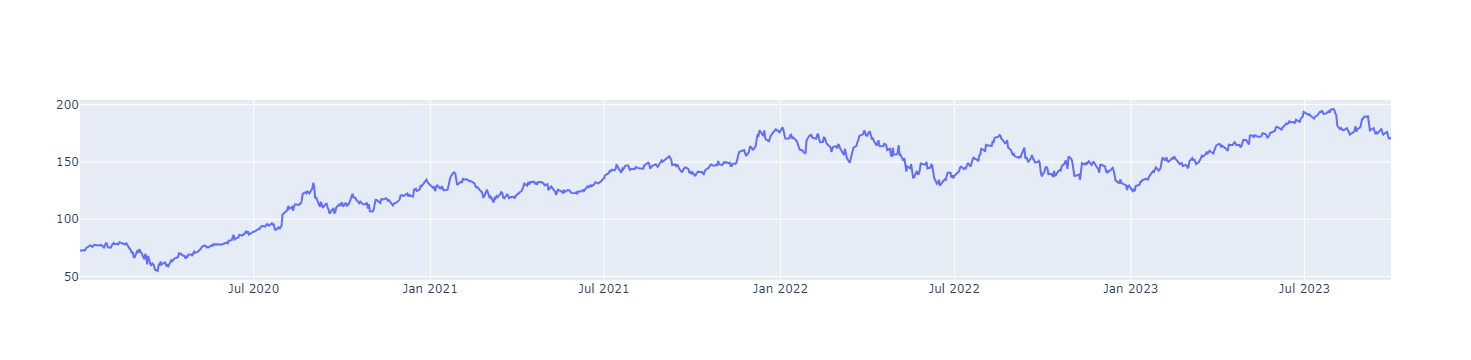

In [113]:
fig = go.Figure(data=go.Scatter(x=df.index,y=df['Close'], mode='lines'))
fig.show()

***Now plot the daily price as Candle stick***

https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

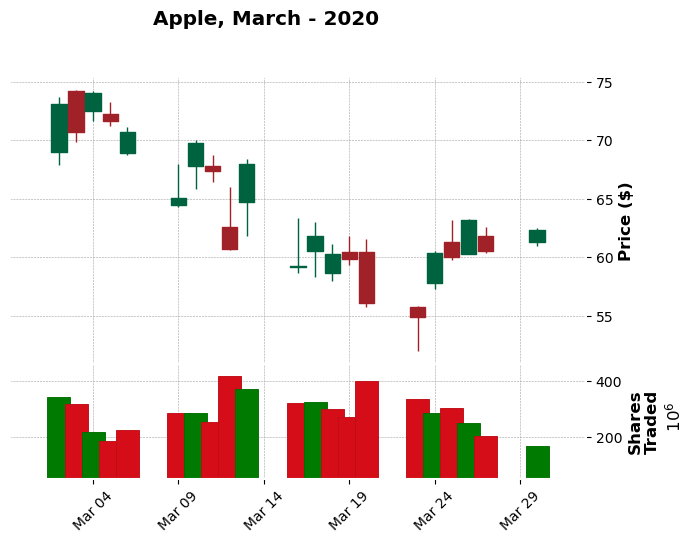

In [114]:
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 3, 30)

# can only do a smaller section of data since you can't zoom in to see the candle sticks using this library (mplfinance)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

import mplfinance as fplt

if not isinstance(df.index, pd.DatetimeIndex):
    # Convert the index to DatetimeIndex if it's not already
    df.index = pd.to_datetime(df.index)   
    
fplt.plot(df, type='candle', style='charles', title='Apple, March - 2020', ylabel='Price ($)', volume = True, ylabel_lower='Shares\nTraded', show_nontrading=True)

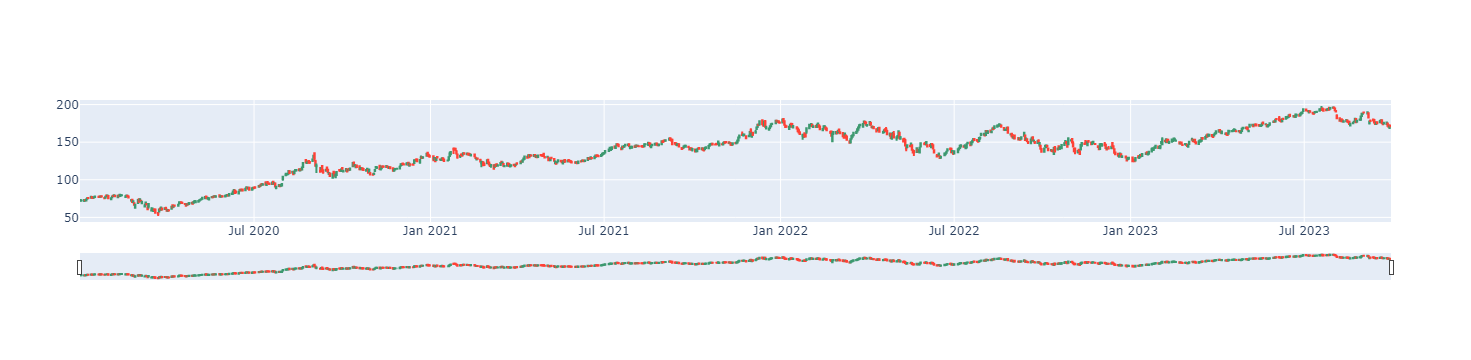

In [115]:
import plotly.graph_objects as go

start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2023, 10, 1)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close']
                            )

fig = go.Figure(data=[candlestick])

fig.show()

### Now load your TA library

In [116]:
import TA as TA

In [117]:
# reload the module if needed
#from importlib import reload
#reload(TA)

### Question 1: Plot the 9, 50, 100, 200 Simple Moving Averages along with the CandleSticks

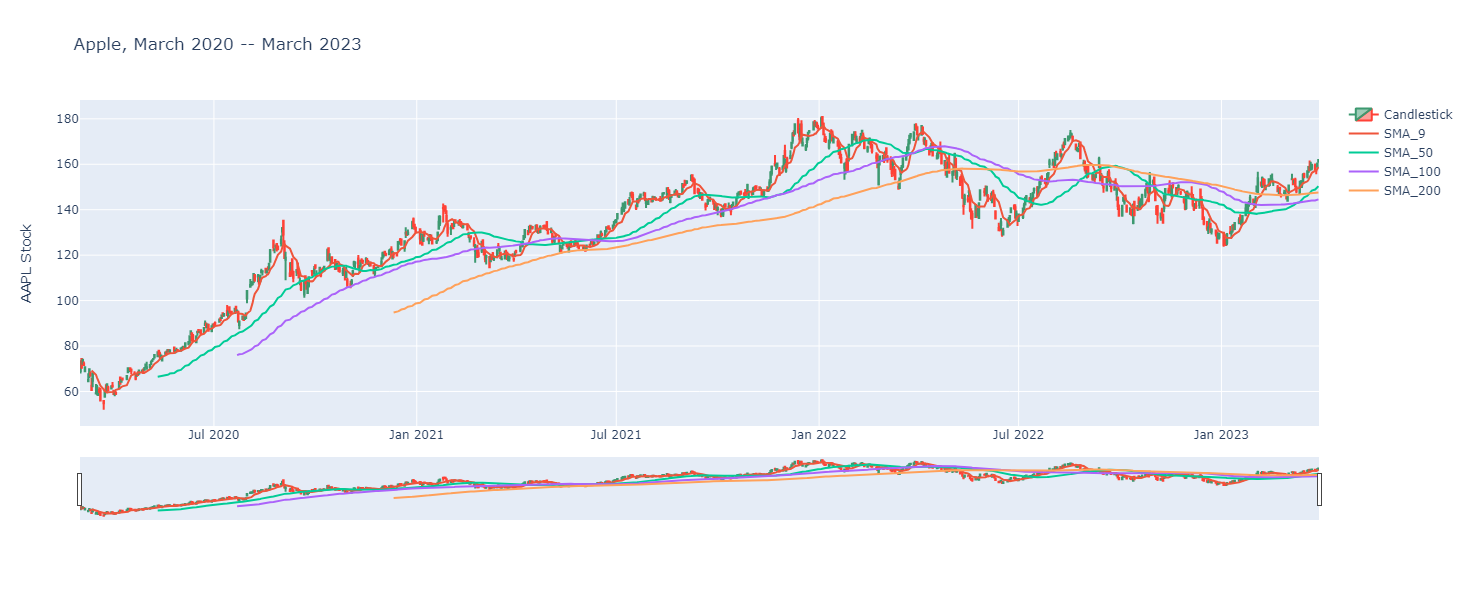

In [118]:
import plotly.graph_objects as go
from TA import SimpleMovingAverages, RSI, ExponentialMovingAverages

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# Initialize SimpleMovingAverages for the desired periods
periods = [9, 50, 100, 200]
smas = SimpleMovingAverages(df, periods)

# Calculate the SMAs
smas.run()

candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'  # Set the name to "Candlestick"
)

# Create a figure
fig = go.Figure(data=[candlestick])  # Start with candlestick trace

# Plot the SMAs using the 'smas' instance
for period in periods:
    df[f'SMA_{period}'] = smas.get_series(period)
    sma = go.Scatter(x=df.index,
                     y=df[f'SMA_{period}'],
                     yaxis="y1",
                     name=f"SMA_{period}"
                    )
    fig.add_trace(sma)  # Add the SMA trace to the figure

fig.update_layout(
    width=800, height=600,
    title="Apple, March 2020 -- March 2023",
    yaxis_title='AAPL Stock'
)

fig.show()

In [119]:
print(s1.tail())
print(s2.tail())
print(s3.tail())
print(s4.tail())

Date
2023-09-25    175.810001
2023-09-26    175.560001
2023-09-27    174.970000
2023-09-28    174.490000
2023-09-29    173.738890
Name: Close, dtype: float64
Date
2023-09-25    183.001623
2023-09-26    182.566255
2023-09-27    182.105480
2023-09-28    181.622542
2023-09-29    181.189352
Name: Close, dtype: float64
Date
2023-09-25    181.797210
2023-09-26    181.846879
2023-09-27    181.897801
2023-09-28    181.873736
2023-09-29    181.855569
Name: Close, dtype: float64
Date
2023-09-25    165.308277
2023-09-26    165.466371
2023-09-27    165.608301
2023-09-28    165.753971
2023-09-29    165.890640
Name: Close, dtype: float64


***Now plot the SMA and EMA on the same graph***

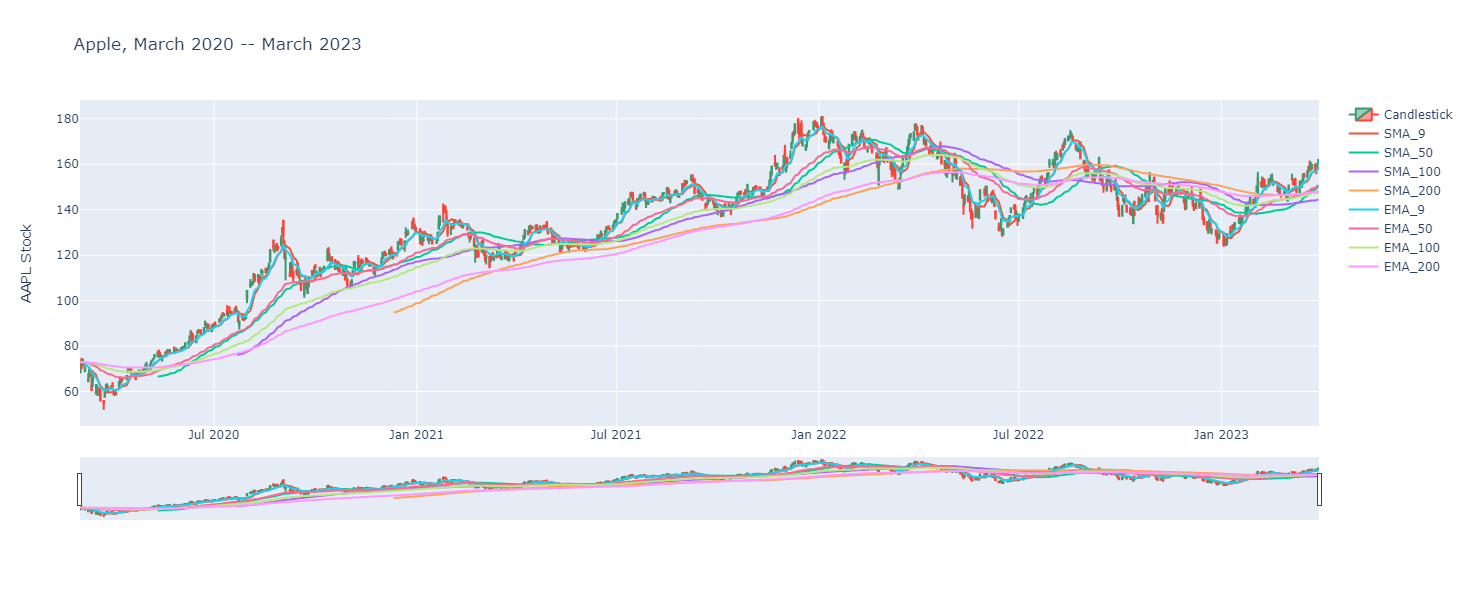

In [120]:
import plotly.graph_objects as go
from TA import SimpleMovingAverages, ExponentialMovingAverages

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# Initialize SimpleMovingAverages and ExponentialMovingAverages for the desired periods
periods = [9, 50, 100, 200]
smas = SimpleMovingAverages(df, periods)
# Calculate the SMAs
smas.run()

# Create a Figure and add the candlestick trace
candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

fig = go.Figure(data=[candlestick])  # Start with the candlestick trace

# Plot the SMAs using the 'smas' instance
for period in periods:
    df[f'SMA_{period}'] = smas.get_series(period)
    sma = go.Scatter(x=df.index,
                     y=df[f'SMA_{period}'],
                     yaxis="y1",
                     name=f"SMA_{period}"
                    )
    fig.add_trace(sma)  # Add the SMA trace to the figure

periods = [9, 50, 100, 200]
emas = ExponentialMovingAverages(df, periods)
# Calculate the EMAs
emas.run()
    
# Plot the EMAs using the 'emas' instance
for period in periods:
    df[f'EMA_{period}'] = emas.get_series(period)
    ema = go.Scatter(x=df.index,
                     y=df[f'EMA_{period}'],
                     yaxis="y1",
                     name=f"EMA_{period}"
                    )
    fig.add_trace(ema)  # Add the EMA trace to the figure

fig.update_layout(
    width=800, height=600,
    title="Apple, March 2020 -- March 2023",
    yaxis_title='AAPL Stock'
)

fig.show()

### Question 2: Plot the 50, 100 Exponential Moving Averages along with the Simple Moving Averages

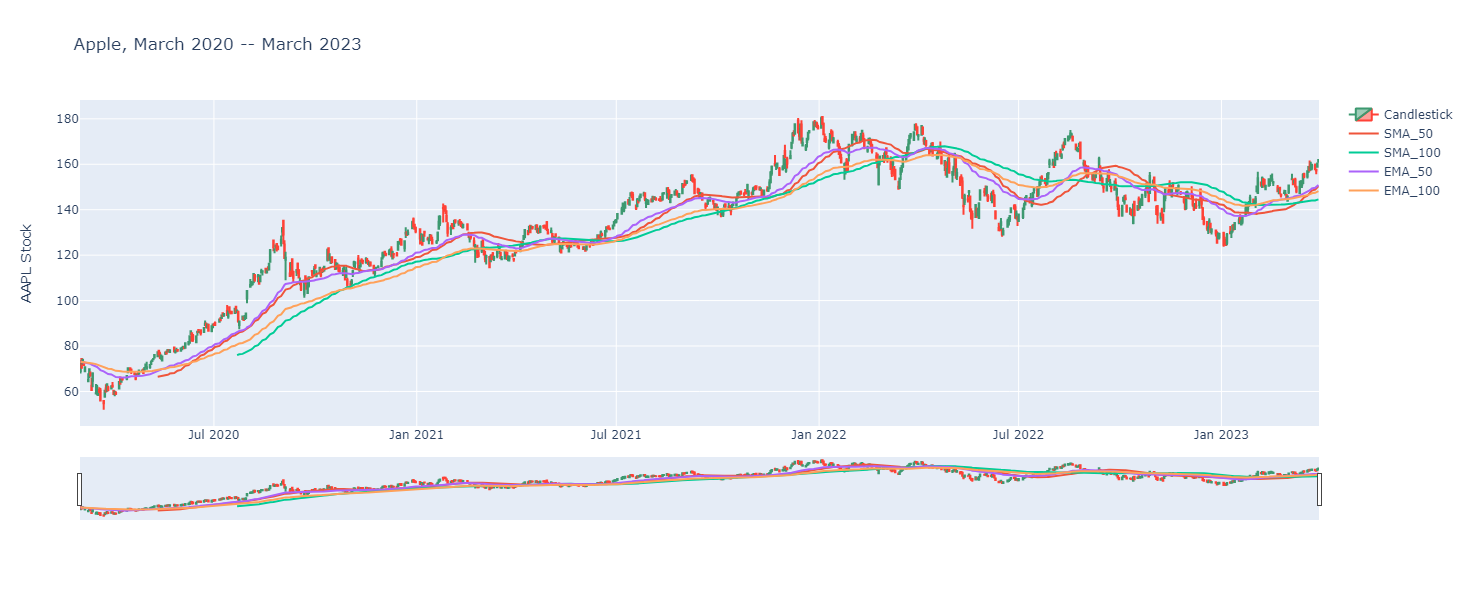

In [121]:
import plotly.graph_objects as go
from TA import SimpleMovingAverages, ExponentialMovingAverages

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# Initialize SimpleMovingAverages and ExponentialMovingAverages for the desired periods
periods = [50, 100]
smas = SimpleMovingAverages(df, periods)
# Calculate the SMAs
smas.run()

# Create a Figure and add the candlestick trace
candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

fig = go.Figure(data=[candlestick])  # Start with the candlestick trace

# Plot the SMAs using the 'smas' instance
for period in periods:
    df[f'SMA_{period}'] = smas.get_series(period)
    sma = go.Scatter(x=df.index,
                     y=df[f'SMA_{period}'],
                     yaxis="y1",
                     name=f"SMA_{period}"
                    )
    fig.add_trace(sma)  # Add the SMA trace to the figure

periods = [50, 100]
emas = ExponentialMovingAverages(df, periods)
# Calculate the EMAs
emas.run()
    
# Plot the EMAs using the 'emas' instance
for period in periods:
    df[f'EMA_{period}'] = emas.get_series(period)
    ema = go.Scatter(x=df.index,
                     y=df[f'EMA_{period}'],
                     yaxis="y1",
                     name=f"EMA_{period}"
                    )
    fig.add_trace(ema)  # Add the EMA trace to the figure

fig.update_layout(
    width=800, height=600,
    title="Apple, March 2020 -- March 2023",
    yaxis_title='AAPL Stock'
)

fig.show()

### Question 3: Plot RSI with additional 70 and 30 horizontal lines

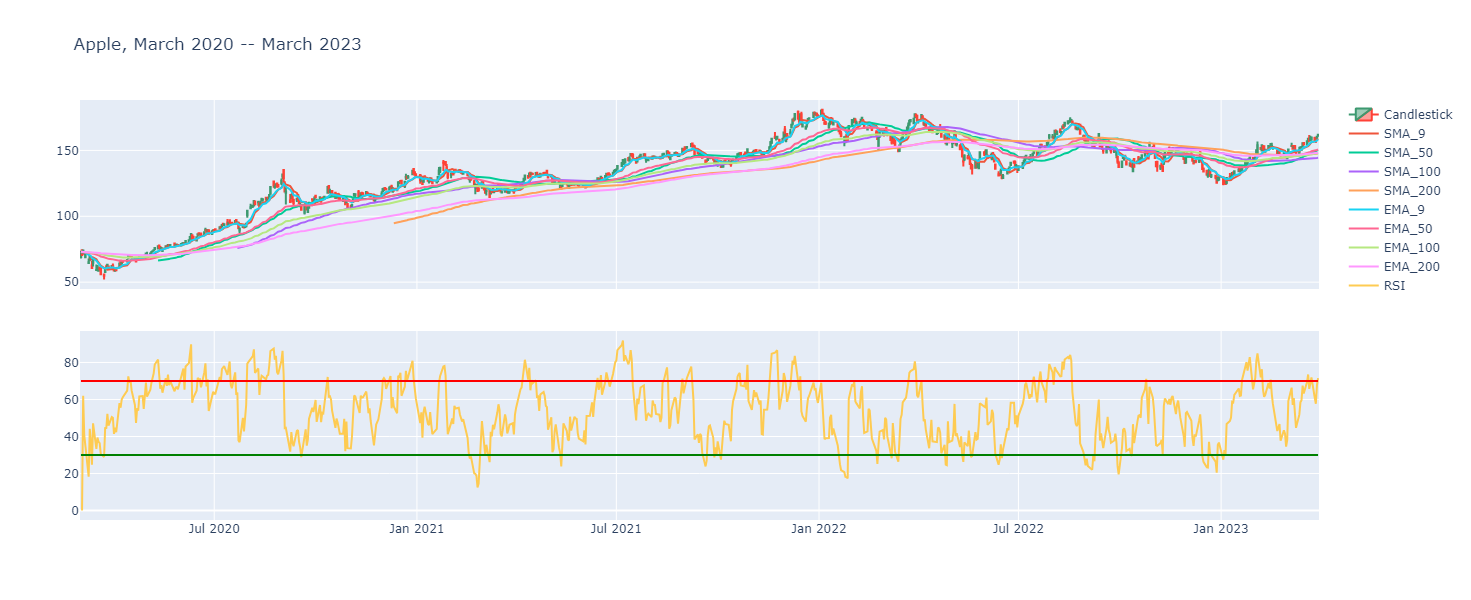

In [124]:
import plotly.subplots as sp
import plotly.graph_objects as go
from TA import SimpleMovingAverages, ExponentialMovingAverages, RSI

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# Initialize SimpleMovingAverages, ExponentialMovingAverages, and RSI for the desired periods
periods = [9, 50, 100, 200]
smas = SimpleMovingAverages(df, periods)
emas = ExponentialMovingAverages(df, periods)
rsi_indicator = RSI(df)

# Calculate the SMAs, EMAs, and RSI
smas.run()
emas.run()
rsi_indicator.run()

# Create a subplot with multiple y-axes
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add the candlestick trace to the first subplot
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
), row=1, col=1)

# Add the SMAs to the first subplot
for period in periods:
    df[f'SMA_{period}'] = smas.get_series(period)
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[f'SMA_{period}'],
        name=f"SMA_{period}"
    ), row=1, col=1)

# Add the EMAs to the first subplot
for period in periods:
    df[f'EMA_{period}'] = emas.get_series(period)
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[f'EMA_{period}'],
        name=f"EMA_{period}"
    ), row=1, col=1)

# Add the RSI to the second subplot
fig.add_trace(go.Scatter(
    x=df.index,
    y=rsi_indicator.get_series(),
    name="RSI"
), row=2, col=1)

# Add horizontal lines at RSI values of 70 and 30 to the second subplot
fig.add_shape(type="line", x0=df.index.min(), x1=df.index.max(), y0=70, y1=70, xref="x", yref="y",
              line=dict(color="red"), row=2, col=1)
fig.add_shape(type="line", x0=df.index.min(), x1=df.index.max(), y0=30, y1=30, xref="x", yref="y",
              line=dict(color="green"), row=2, col=1)

# Update the layout to customize the appearance
fig.update_layout(
    width=800,
    height=600,
    title="Apple, March 2020 -- March 2023",
    xaxis_rangeslider_visible=False,
)

fig.show()


### Question 4: Plot the VWAP along with the 20, 50 Simple Moving Averages and the Candlesticks

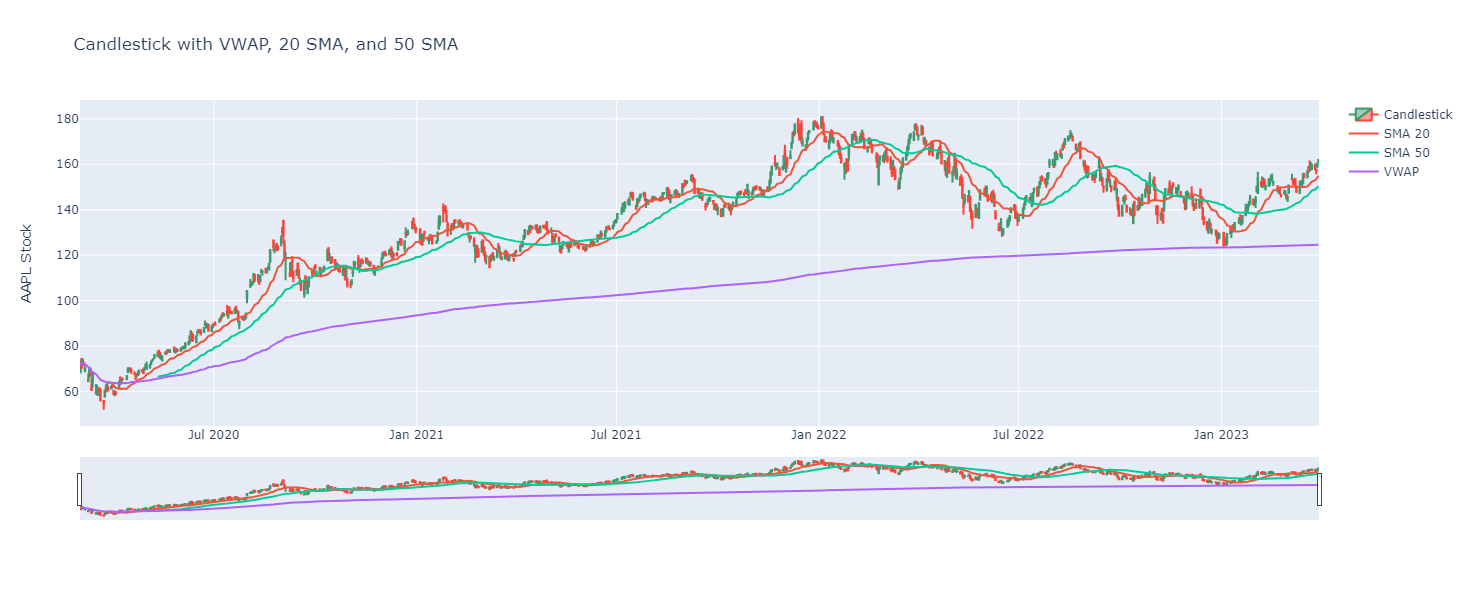

In [123]:
import plotly.graph_objects as go
from TA import SimpleMovingAverages, VWAP

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# Initialize SimpleMovingAverages and VWAP for the desired periods
periods = [20, 50]
smas = SimpleMovingAverages(df, periods)
vwap_indicator = VWAP(df)

# Calculate the SMAs and VWAP
smas.run()
vwap_indicator.run()

# Create the main candlestick chart
candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

# Create the 20 and 50 SMA traces
sma_20 = go.Scatter(x=df.index, y=smas.get_series(20), name="SMA 20")
sma_50 = go.Scatter(x=df.index, y=smas.get_series(50), name="SMA 50")

# Create the VWAP chart
vwap_chart = go.Scatter(
    x=df.index,
    y=vwap_indicator.get_series(),
    name="VWAP"
)

# Create subplots for the main chart and VWAP
fig = go.Figure()

fig.add_trace(candlestick)  # Add the main candlestick chart
fig.add_trace(sma_20)  # Add the 20 SMA trace
fig.add_trace(sma_50)  # Add the 50 SMA trace
fig.add_trace(vwap_chart)  # Add the VWAP chart

# Update the layout
fig.update_layout(
    width=800,
    height=600,
    title="Candlestick with VWAP, 20 SMA, and 50 SMA",
    yaxis_title='AAPL Stock'
)

fig.show()
